In [1]:
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

df_original = pd.read_csv("BPI2016_Clicks_Logged_In.csv", encoding_errors="ignore", on_bad_lines='skip', sep=";",
                usecols=['CustomerID', 'AgeCategory', 'Gender', 'Office_U', 'Office_W',
       'SessionID', 'IPID', 'TIMESTAMP', 'VHOST', 'URL_FILE', 'PAGE_NAME',
       'REF_URL_category', 'page_load_error', 'page_action_detail', 'tip',
       'service_detail', 'xps_info'])
df_original["TIMESTAMP"] = pd.to_datetime(df_original["TIMESTAMP"], infer_datetime_format=True)

C:\Users\jveldman\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (11,13,14,15,16) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [2]:
#Calculate how many times each activity is repeated
df_for_gby = df_original.sort_values(["SessionID", "TIMESTAMP"])[["SessionID", "URL_FILE"]]



In [3]:
df_for_gby["consecutive"] = df_for_gby.groupby("SessionID")["URL_FILE"].shift(periods=-1)
df_for_gby["Count_ww"] = (df_for_gby["URL_FILE"] == "/portal/page/portal/home/diensten/aanvragen-ww").astype(int)
df_for_gby['consecutive_agg'] = df_for_gby.Count_ww.groupby((df_for_gby.Count_ww != df_for_gby.Count_ww.shift()).cumsum()).transform('size') * df_for_gby.Count_ww
df_for_gby

,SessionID,URL_FILE,consecutive,Count_ww,consecutive_agg
3273278,46,/werk_nl/werknemer/mijn_werkmap/doorgeven/taken,/werk_nl/werknemer/mijn_werkmap/doorgeven/mijn...,0,0
5333642,46,/werk_nl/werknemer/mijn_werkmap/doorgeven/mijn...,/werk_nl/werknemer/mijn_werkmap/postvak/mijn_d...,0,0
3733243,46,/werk_nl/werknemer/mijn_werkmap/postvak/mijn_d...,/werk_nl/werknemer/mijn_werkmap/postvak/mijn_b...,0,0
5904405,46,/werk_nl/werknemer/mijn_werkmap/postvak/mijn_b...,/werk_nl/werknemer/mijn_werkmap/postvak/mijn_b...,0,0
5573282,46,/werk_nl/werknemer/mijn_werkmap/postvak/mijn_b...,/werk_nl/werknemer/mijn_werkmap/postvak/mijn_b...,0,0
...,...,...,...,...,...
1613546,55314751,/werk_nl/werknemer/werkmap,/werk_nl/werknemer/mijn_werkmap/doorgeven/taken,0,0
2925569,55314751,/werk_nl/werknemer/mijn_werkmap/doorgeven/taken,/werk_nl/werknemer/mijn_werkmap/doorgeven/taken,0,0
4068602,55314751,/werk_nl/werknemer/mijn_werkmap/doorgeven/taken,/werk_nl/werknemer/mijn_werkmap/doorgeven/taken,0,0
5013440,55314751,/werk_nl/werknemer/mijn_werkmap/doorgeven/taken,/werk_nl/werknemer/mijn_werkmap/doorgeven/taken,0,0


In [4]:
#Get all the repetitions
empty_list = []

for row in df_for_gby.values:
    if row[-1] == 0:
        je_mag_opslaan = True
    if je_mag_opslaan == True and row[-1] > 0:
        empty_list.append([row[0], row[1], row[-1]])
        je_mag_opslaan = False

repetition_df = pd.DataFrame(empty_list, columns=["SessionID", "URL_FILE", "Rep_count"])

In [5]:
repetition_df

,SessionID,URL_FILE,Rep_count
0,5199,/portal/page/portal/home/diensten/aanvragen-ww,62
1,5199,/portal/page/portal/home/diensten/aanvragen-ww,1
2,5258,/portal/page/portal/home/diensten/aanvragen-ww,1
3,21014,/portal/page/portal/home/diensten/aanvragen-ww,24
4,33941,/portal/page/portal/home/diensten/aanvragen-ww,2
...,...,...,...
17976,54523244,/portal/page/portal/home/diensten/aanvragen-ww,3
17977,54592691,/portal/page/portal/home/diensten/aanvragen-ww,13
17978,55085137,/portal/page/portal/home/diensten/aanvragen-ww,39
17979,55149893,/portal/page/portal/home/diensten/aanvragen-ww,33


In [6]:
repetition_df[repetition_df["URL_FILE"] == "/portal/page/portal/home/diensten/aanvragen-ww"]["SessionID"].unique().shape

(11568,)

In [7]:
df_aanvragen_rep_in_session = repetition_df[repetition_df["URL_FILE"] == "/portal/page/portal/home/diensten/aanvragen-ww"].groupby("SessionID").count()

In [8]:
count_rep_pattern = df_aanvragen_rep_in_session["Rep_count"].value_counts()

In [9]:
count_rep_pattern

1     7106
2     3062
3     1048
4      232
5       76
6       23
7       12
8        6
9        2
11       1
Name: Rep_count, dtype: int64

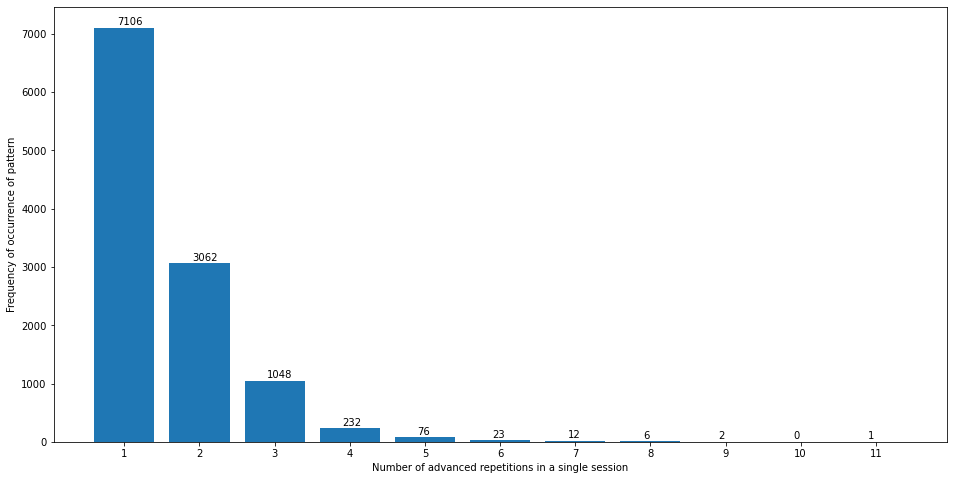

In [11]:
x = count_rep_pattern.index
y = count_rep_pattern.values

plt.figure(figsize=(16, 8))
#add point x = 10 and y = 0 manually
plt.bar([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11], [7106, 3062, 1048, 232, 76, 23, 12, 6, 2, 0, 1])
plt.ylabel('Frequency of occurrence of pattern')
plt.xlabel('Number of advanced repetitions in a single session')
plt.xticks([1,2,3,4,5,6,7,8,9,10, 11])

for index, value in enumerate( [7106, 3062, 1048, 232, 76, 23, 12, 6, 2, 0, 1]):
    plt.text(index+0.90, value+50, str(value))
    
plt.savefig('repetition_figures/rep_dist_pattern_3.png');
plt.show()

In [12]:
df_aanvragen_rep_in_session.agg({'Rep_count':['mean', 'std', 'min', 'max', 'count', 'sum']}).T

,mean,std,min,max,count,sum
Rep_count,1.554374,0.858835,1.0,11.0,11568.0,17981.0


In [13]:
anomaly_sessions = df_aanvragen_rep_in_session[df_aanvragen_rep_in_session["Rep_count"] > 3].index.unique()


In [14]:
anomaly_sessions.shape

(352,)

In [15]:
anomaly_or_normal = []
for session in df_original["SessionID"]:
    if session in list(anomaly_sessions):
        anomaly_or_normal.append("potential_anomaly")
    else:
        anomaly_or_normal.append("normal")

In [16]:
df_original["Label"] = anomaly_or_normal

In [ ]:
df_original.to_csv("uwv_data_with_labels_pattern_2.csv")